### Second computer vision task  GRIP foundation (color identification)
# Ali Saleem Hasan

## What is color identification

color identification is the process of extract colors from images or match images to a color  

## import libraries

In [1]:
import imp
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2
from skimage.color import rgb2lab,deltaE_cie76
from collections import Counter
import os

C:\Users\ali1s\AppData\Local\Temp\ipykernel_26964\3300348429.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [88]:
def readImage(imagePath):
    img = cv2.imread(imagePath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

### represent colors in hexadecimals
to display hex values of used colors in images 


In [89]:
def RGB2HEX(color):
    return '#{:02x}{:02x}{:02x}'.format(int(color[0]),int(color[1]),int(color[2]))

## extract colors 

[array([154.65848708, 134.51703567, 131.12755228]),
 array([223.85044619, 171.45081174, 109.89560262]),
 array([ 88.52579158,  96.58628958, 112.29000922]),
 array([20.03181893, 58.00562728, 86.91343926]),
 array([  1.42250287,  97.97832951, 165.73435706]),
 array([97.33851575, 64.40567993, 32.94931592]),
 array([198.62168768, 123.76537175,  41.07267816]),
 array([20.75102332, 32.27031134, 29.79868519])]

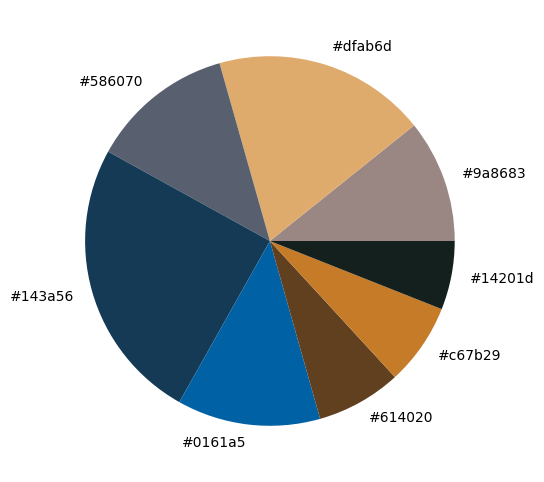

In [130]:
def extractColors(image,number_of_colors=5,display_chart=False):
    img = cv2.resize(image,(360,360),interpolation = cv2.INTER_AREA)
    img = np.reshape(img,(img.shape[0]*img.shape[1],3))
    clusters = KMeans(number_of_colors)
    labels = clusters.fit_predict(img)
    counts = Counter(labels)
    center_colors = clusters.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    HEX_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    RGB_colors = [ordered_colors[i] for i in counts.keys()]
    

    if display_chart:
        plt.figure(figsize=(8,6))
        plt.pie(x=counts.values(), labels=HEX_colors,colors=HEX_colors)
    

    return RGB_colors
    

extractColors(readImage('images/4.jpg'),8,display_chart=True)

    


## match images with colors 
first we need to extract colors from images and compare desired color with 
image colors , if there is similarity then this image has this color

In [91]:
from pickletools import uint8


def match_color_to_image(image,color,number_of_colors = 5,threshold=60):
    image_colors = extractColors(image,number_of_colors= number_of_colors,display_chart=False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    matched = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            matched = True
    
    return matched



#### define colors Array to test our code

In [138]:

colors = {
    'green':[0,110,0],
    'blue':[0,0,200],
    'red':[150,0,0],
    'yellow':[150,150,0]
}

In [139]:
def get_images(IMAGE_DIRECTORY):
    if not os.path.exists(IMAGE_DIRECTORY):
        return
    images = []
    images_in_directory = os.listdir(IMAGE_DIRECTORY)
    plt.figure(figsize=(6,6))
    for index,file in enumerate(os.listdir(IMAGE_DIRECTORY)):
        if not file.startswith('.'):
            images.append(readImage(os.path.join(IMAGE_DIRECTORY, file)))
    return images
            
   
images = get_images(IMAGE_DIRECTORY="images")

<Figure size 600x600 with 0 Axes>

False
False
False
True


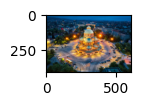

In [140]:
def match_colors_with_images(color,images,number_of_colors,threshold):
    index = 1
    for image in images:
        matched = match_color_to_image(image,color,number_of_colors,threshold)
        print(matched)
        if matched:
            plt.subplot(1,5,index)
            plt.imshow(image)
            index = index+1

match_colors_with_images(colors['blue'],images,8,100)